In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 
20 20 20 20 20


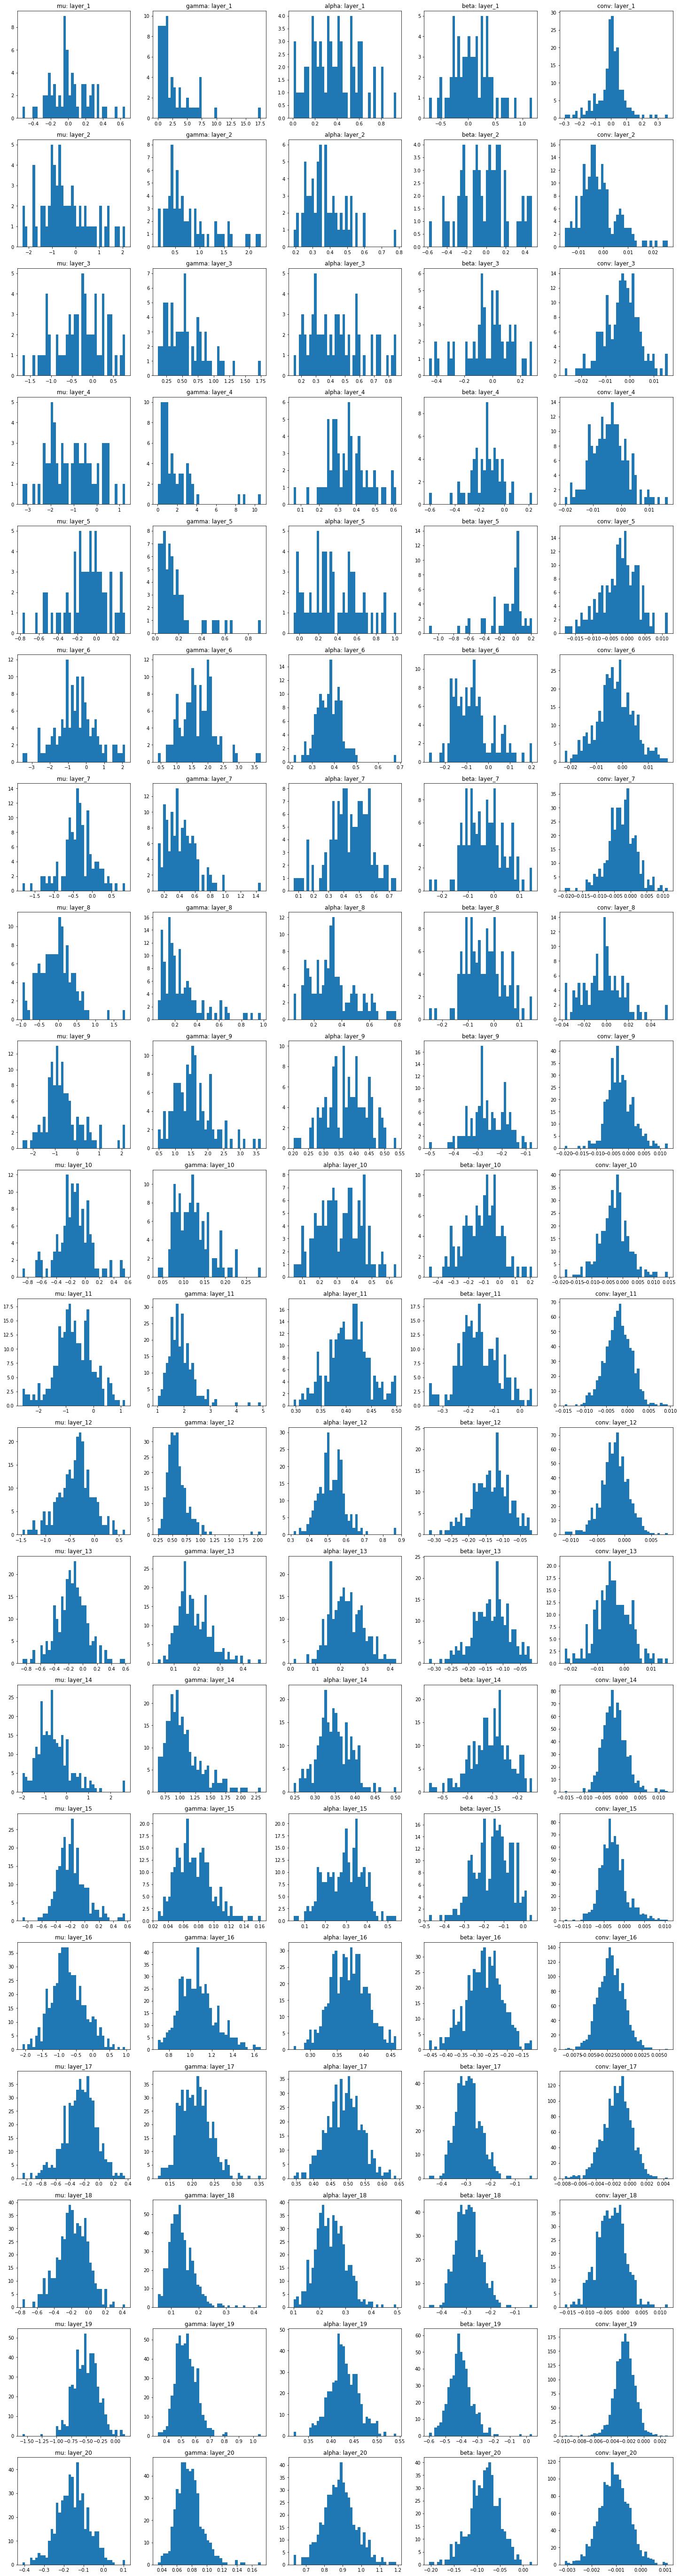

In [72]:
#bn
model = torch.load("results/resnet18_bn_bsz_128/epoch_199.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("bn(bn-relu).pdf")
plt.show()


============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 
20 20 20 20 20


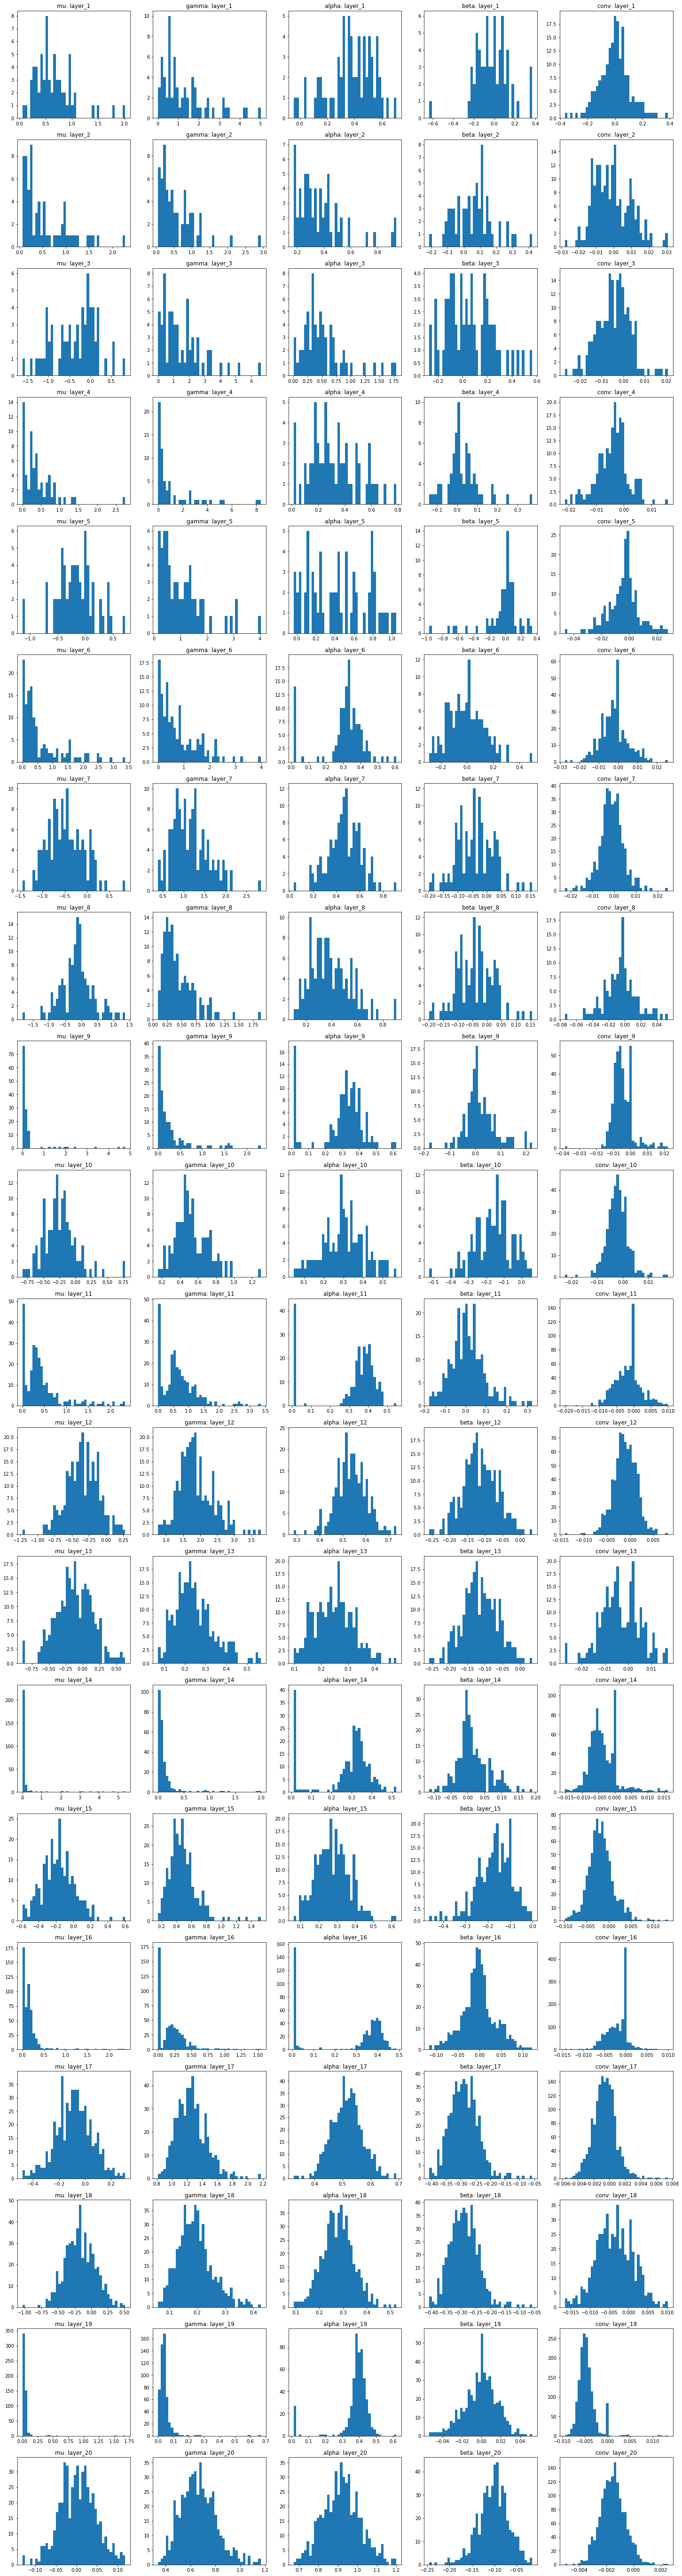

In [71]:
# bn after relu
model = torch.load("results/resnet_inverse_18/epoch_199.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("bn(relu-bn).pdf")
plt.show()

(\)

============mu =========== 
============gamma =========== 
============conv =========== 
17 17 20 20 20


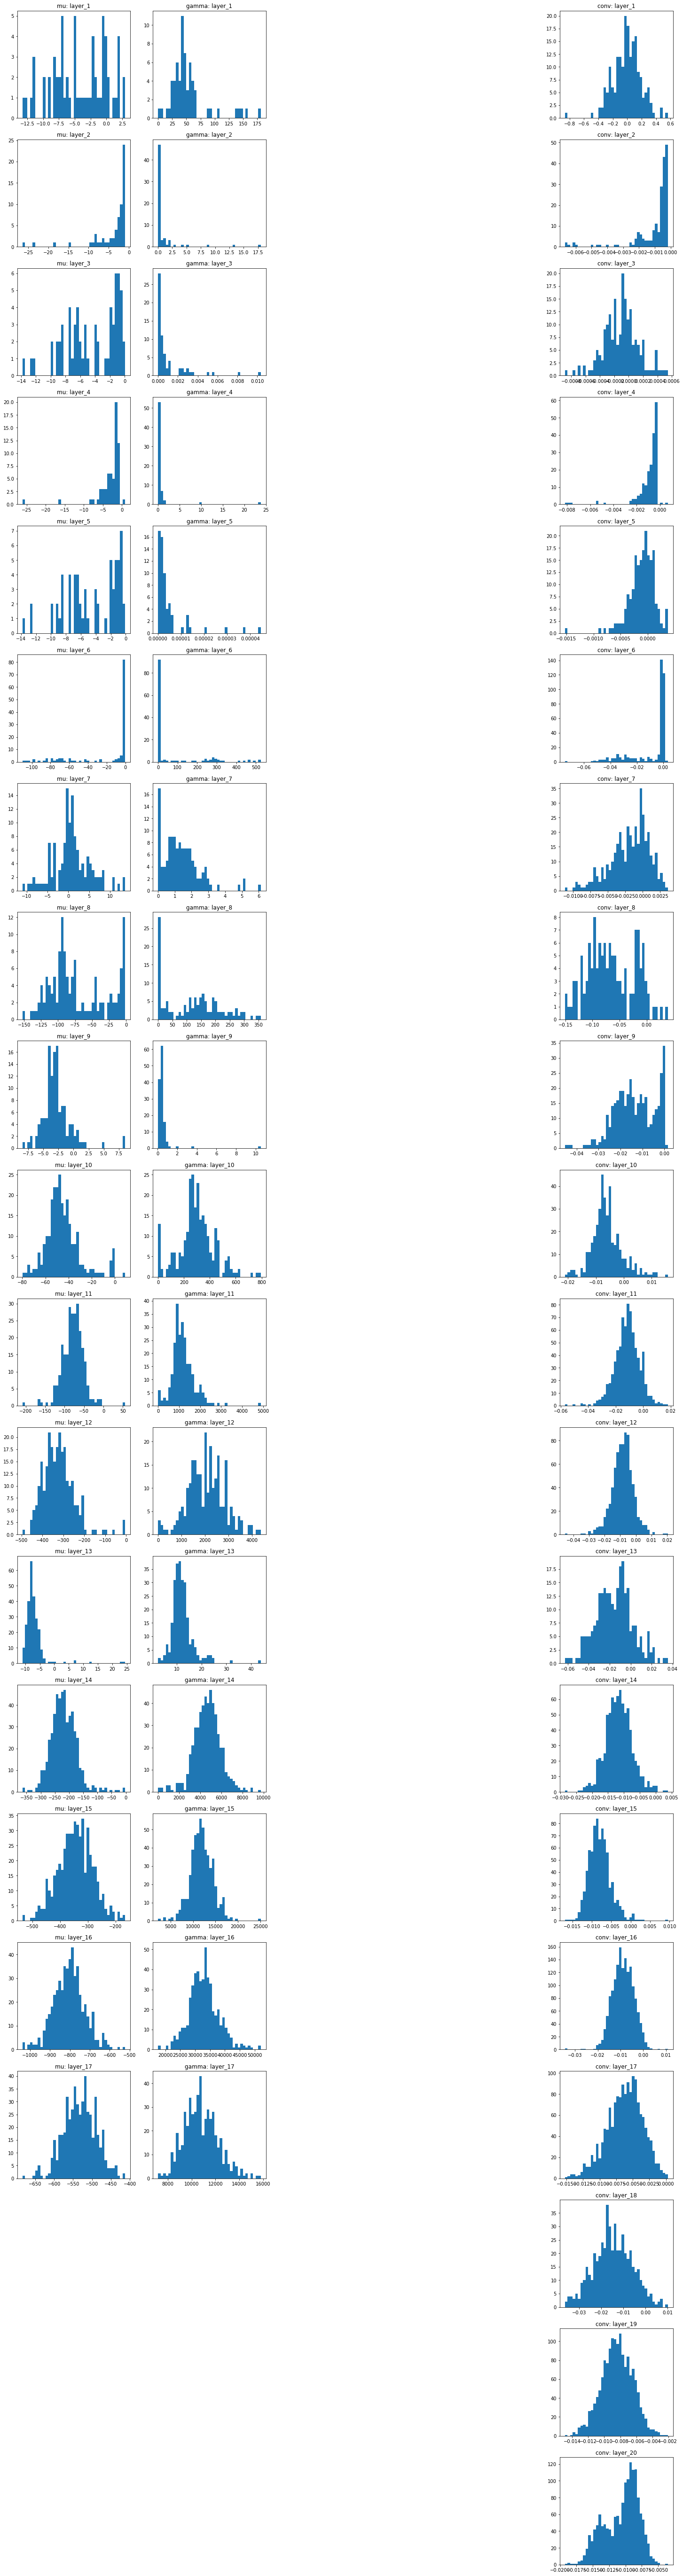

In [70]:
#sgd
model = torch.load("results/results/resnet18_nobn_bsz_128_1/_Thu-Jul--9-11:38:46-2020/epoch_200.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(conv), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(conv), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
# print("============alpha =========== ")


# alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
#         ('downsample.1' in i and 'weight' in i)]
# for i in range(len(alpha)):
#     plt.subplot( len(conv),5, i*5+3)
#     plt.hist(alpha[i].view(-1).numpy(), bins=40)
#     plt.title("alpha: layer_{}".format(i+1))

# print("============betta =========== ")


# beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
#         ('downsample.1' in i and 'bias' in i)]
# for i in range(len(beta)):
#     plt.subplot( len(conv),5, i*5+4)
#     plt.hist(beta[i].view(-1).numpy(), bins=40)
#     plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(conv),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("sgd.pdf")


plt.show()




============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


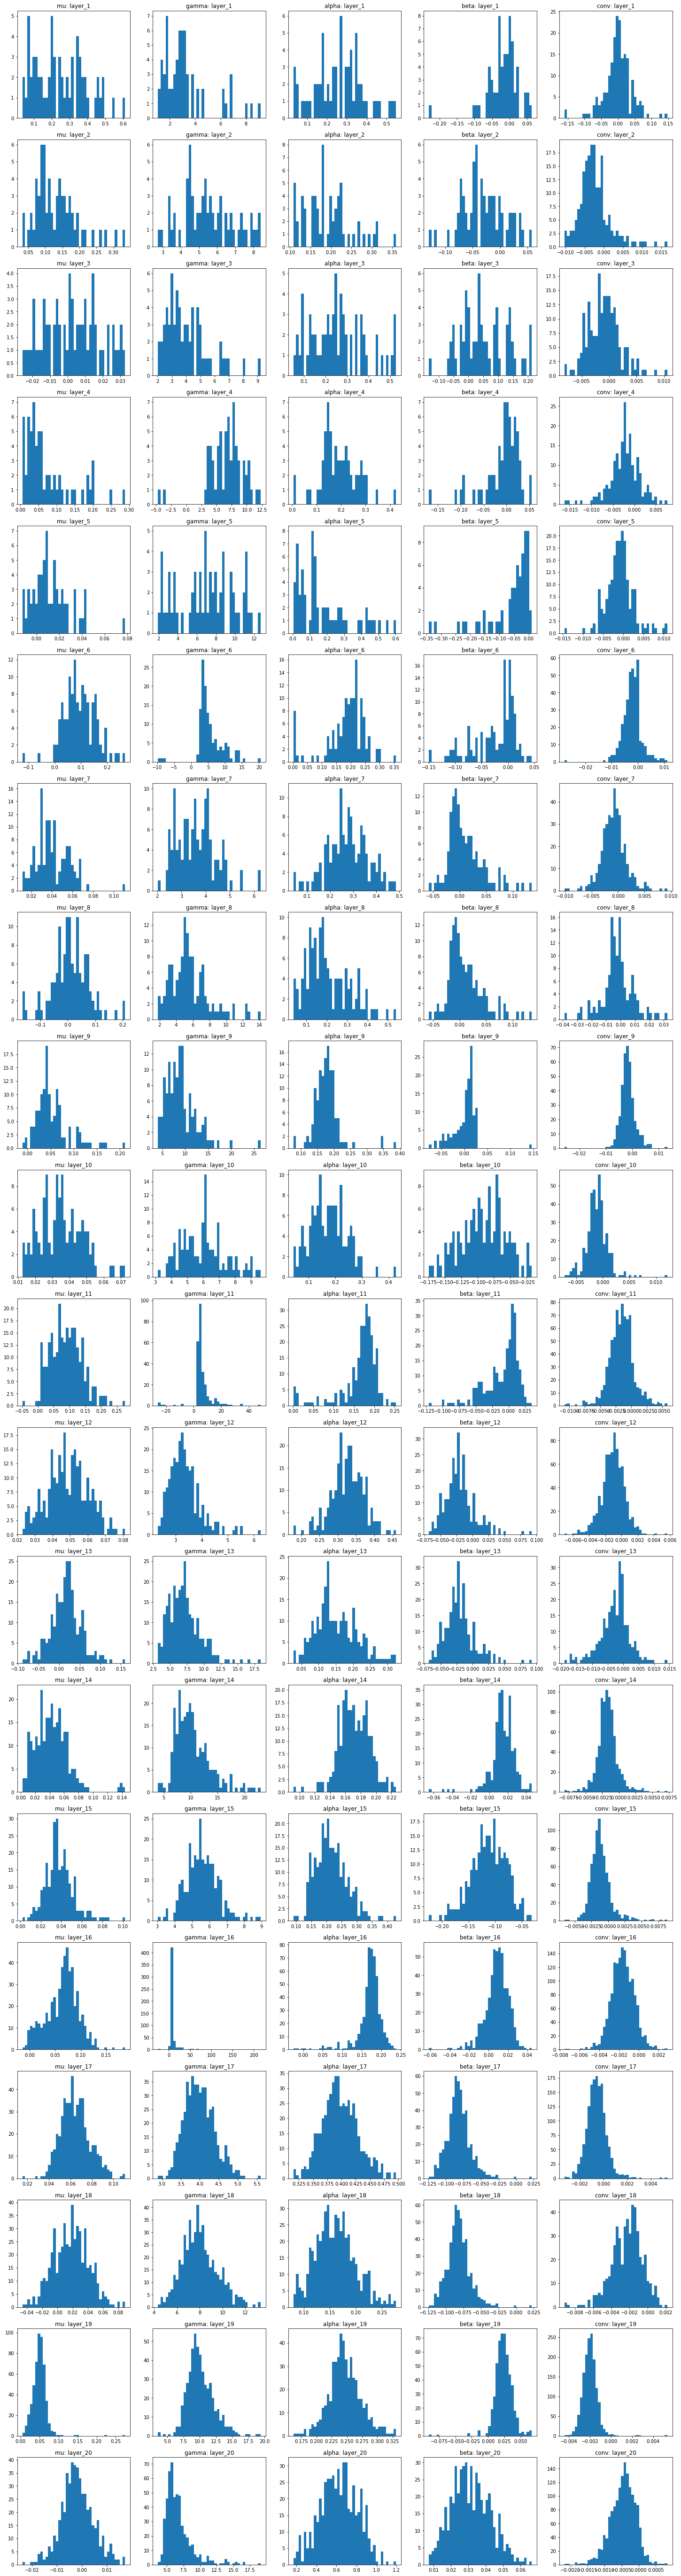

20 20 20 20 20


In [212]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(1/(gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

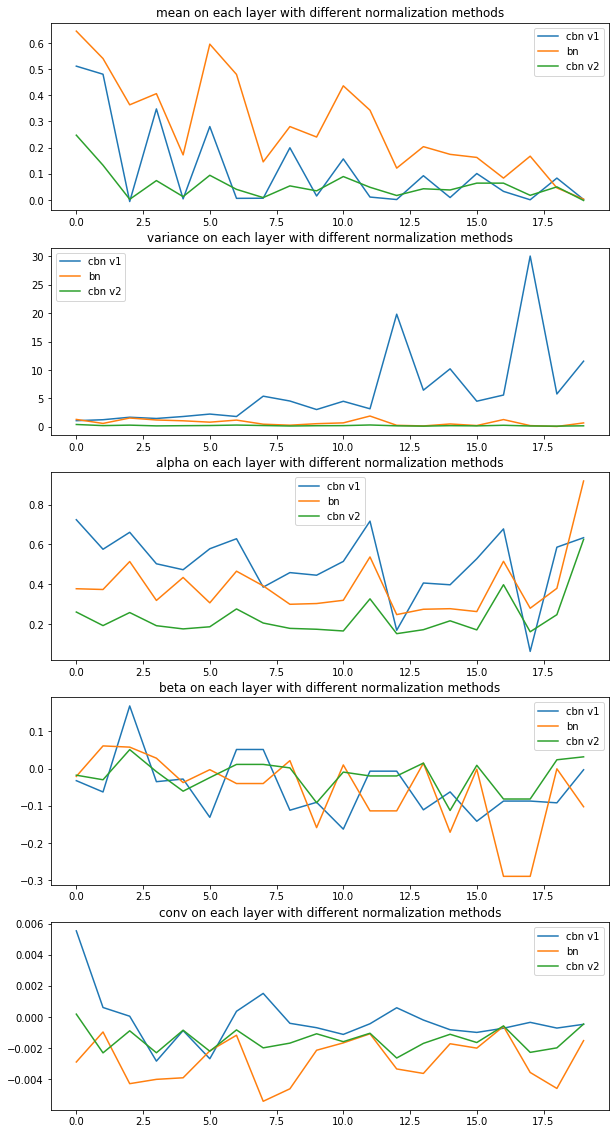

In [275]:
model = torch.load("../gamma_nominator/dual_bn/results/vgg/resnet18_constraint_bsz_128_gamma-nominator/epoch_199.pth",map_location="cpu")
model1 = torch.load("results/results/resnet18_nobn_bsz_128_1/_Thu-Jul--9-11:38:46-2020/epoch_200.pth", map_location="cpu")
model2 = torch.load("results/resnet_inverse_18/epoch_199.pth", map_location="cpu")
model3 = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")



mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
mu = [i.mean() for i in mu]

mu1 = [j  for (i,j) in model1['state_dict'].items() if 'running_mean' in i]
mu1 = [i.mean().abs() for i in mu1]

mu2 = [j  for (i,j) in model2['state_dict'].items() if 'running_mean' in i]
mu2 = [i.mean().abs() for i in mu2]
mu3 = [j  for (i,j) in model3['state_dict'].items() if 'mu_' in i]
mu3 = [i.mean() for i in mu3]

plt.figure(figsize=(10,20))
plt.subplot(5, 1, 1)
plt.plot(mu, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(mu2, label="bn")
plt.plot(mu3, label="cbn v2")
plt.legend()
plt.title("mean on each layer with different normalization methods")

gamma = [1/(j+1e-4)  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
gamma = [i.mean() for i in gamma]
gamma1 = [j  for (i,j) in model1['state_dict'].items() if 'running_var' in i]
gamma1 = [i.mean() for i in gamma1]


gamma2 = [j  for (i,j) in model2['state_dict'].items() if 'running_var' in i]
gamma2 = [i.mean() for i in gamma2]

gamma3 = [j  for (i,j) in model3['state_dict'].items() if 'gamma_' in i]
gamma3 = [i.mean() for i in gamma3]


plt.subplot(5, 1, 2)



plt.plot(gamma, label="cbn v1")
# plt.plot(gamma1, label="plain (sgd)")
plt.plot(gamma2, label="bn")
plt.plot(gamma3, label="cbn v2")
plt.legend()



plt.title("variance on each layer with different normalization methods")

alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
alpha = [i.mean() for i in alpha]

alpha2 = [j  for (i,j) in model2['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
alpha2 = [i.mean() for i in alpha2]

alpha3 = [j  for (i,j) in model3['state_dict'].items() if 'u_' in i and 'mu_' not in i]
alpha3 = [i.mean() for i in alpha3]
plt.legend()


plt.subplot(5, 1, 3)



plt.plot(alpha, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(alpha2, label="bn")
plt.plot(alpha3, label="cbn v2")
plt.legend()



plt.title("alpha on each layer with different normalization methods")

beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i ]
beta = [i.mean() for i in beta]

beta2 = [j  for (i,j) in model2['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]

beta2 = [i.mean() for i in beta2]


beta3 = [j  for (i,j) in model3['state_dict'].items() if 'c_' in i ]
beta3 = [i.mean() for i in beta3]
plt.legend()


plt.subplot(5, 1, 4)



plt.plot(beta, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(beta2, label="bn")
plt.plot(beta3, label="cbn v2")

plt.legend()


plt.title("beta on each layer with different normalization methods")

conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv = [i.mean() for i in conv]

conv1 = [j  for (i,j) in model1['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv1 = [i.mean() for i in conv1]


conv2 = [j  for (i,j) in model2['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv2 = [i.mean() for i in conv2]

conv3 = [j  for (i,j) in model3['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv3 = [i.mean() for i in conv3]

plt.subplot(5, 1, 5)



plt.plot(conv, label="cbn v1")
# plt.plot(conv1, label="plain (sgd)")
plt.plot(conv2, label="bn")
plt.plot(conv3, label="cbn v2")

plt.legend()


plt.title("conv on each layer with different normalization methods")




plt.legend()
plt.show()



In [257]:
conv2[0].shape

(64, 3, 3, 3)

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


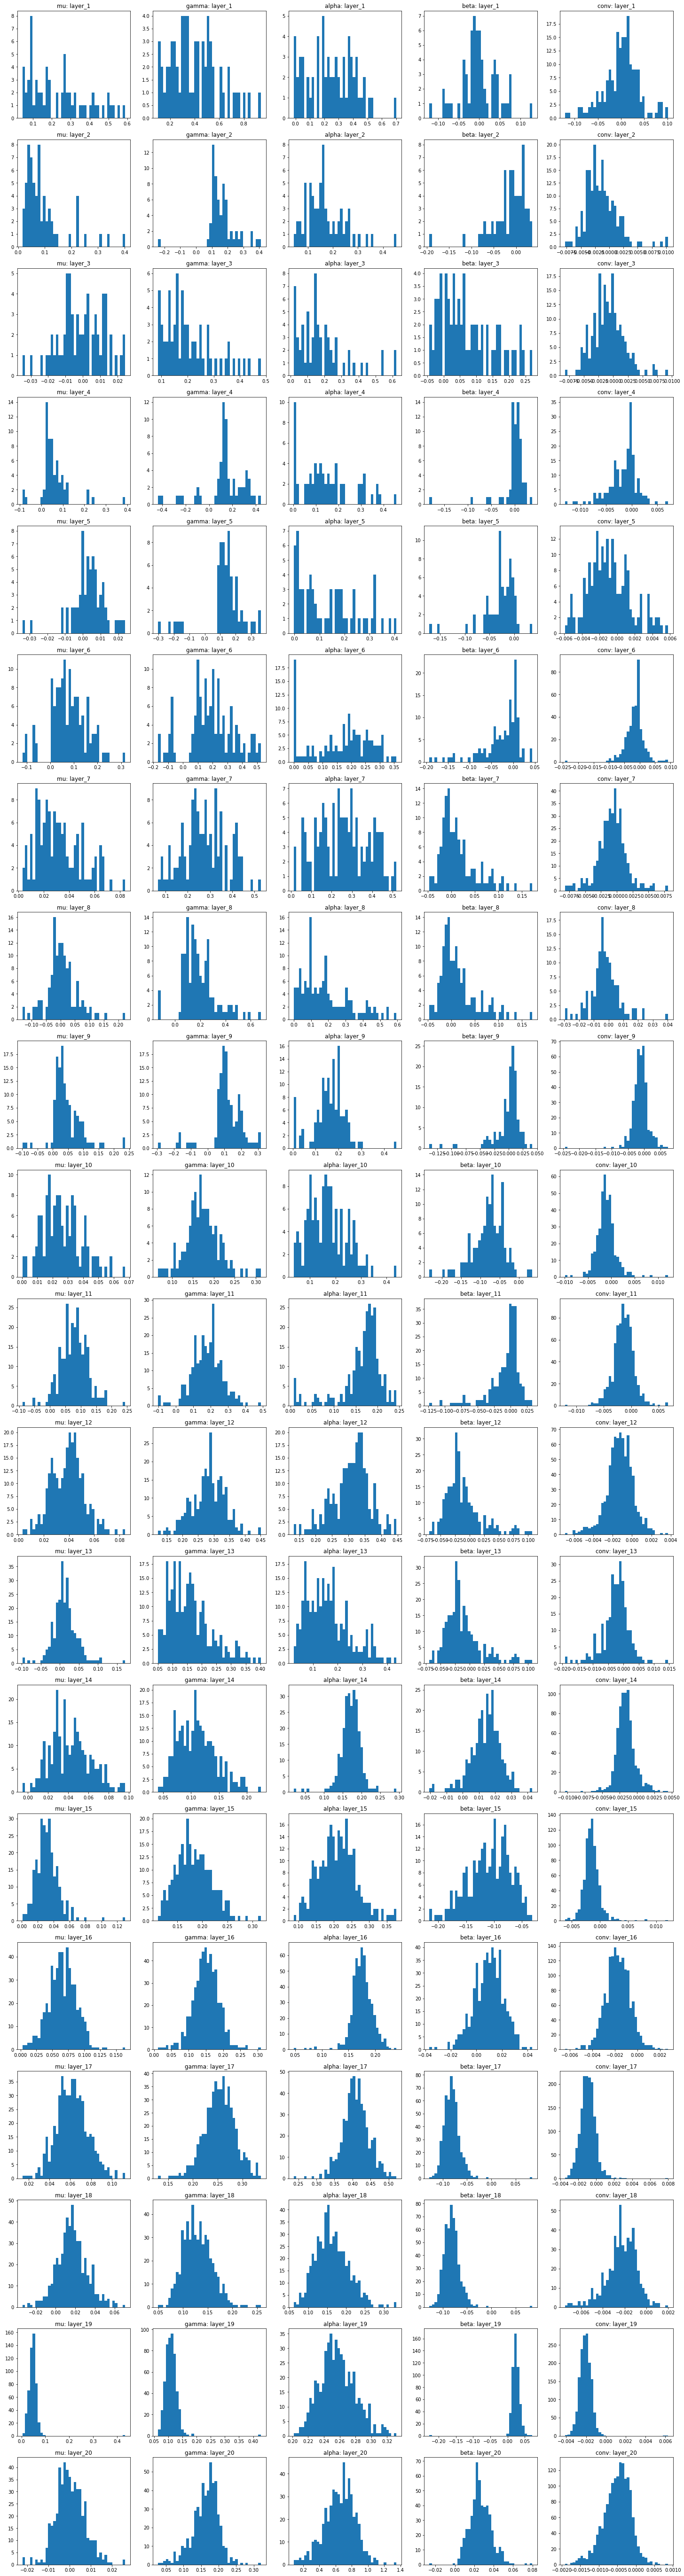

20 20 20 20 20


In [69]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist((gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


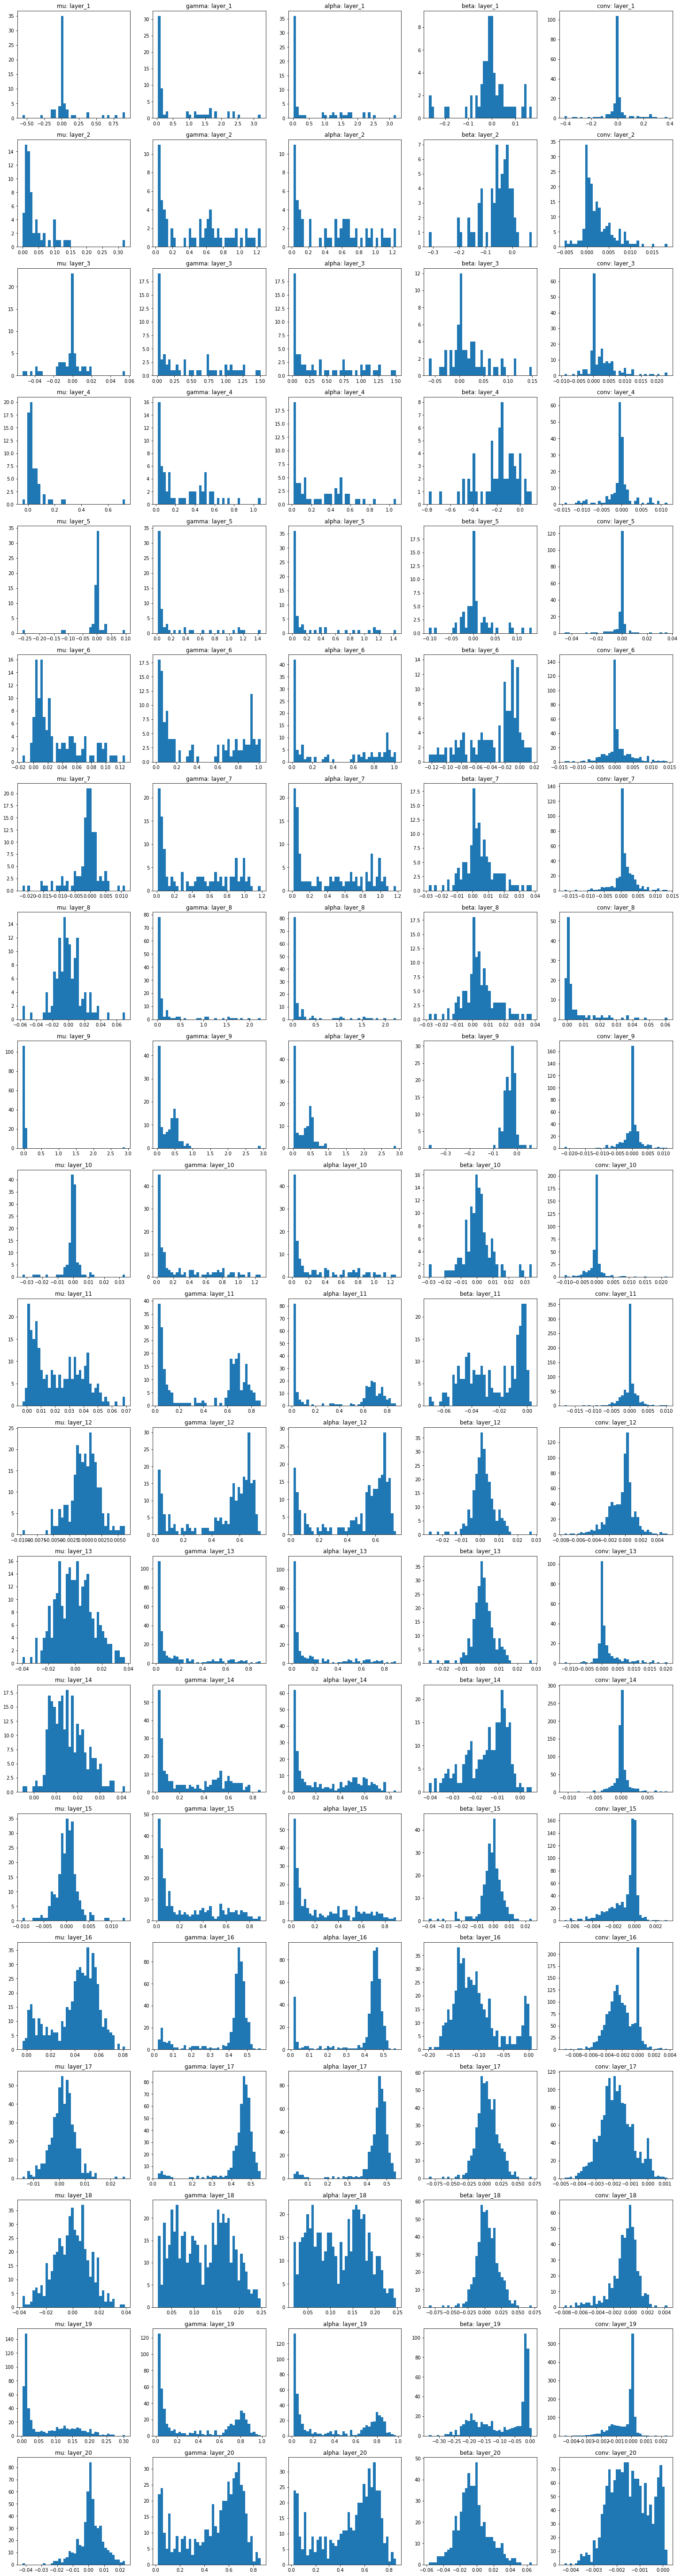

20 20 20 20 20


In [68]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128_wo_weight/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist((gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn_wo_weight-decay.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))


============mu =========== 
============gamma =========== 
============alpha =========== 
0.00038533105
layer 0 gamma**2<1e-3: 5
0.0038237371
layer 1 gamma**2<1e-3: 0
0.013492415
layer 2 gamma**2<1e-3: 0
0.0021811633
layer 3 gamma**2<1e-3: 0
0.0036521726
layer 4 gamma**2<1e-3: 0
0.001420319
layer 5 gamma**2<1e-3: 0
0.0089472
layer 6 gamma**2<1e-3: 0
0.00053350785
layer 7 gamma**2<1e-3: 3
0.000494995
layer 8 gamma**2<1e-3: 1
0.0043148273
layer 9 gamma**2<1e-3: 0
0.002497561
layer 10 gamma**2<1e-3: 0
0.010145164
layer 11 gamma**2<1e-3: 0
2.6425594e-05
layer 12 gamma**2<1e-3: 26
0.0011801083
layer 13 gamma**2<1e-3: 0
0.0032658137
layer 14 gamma**2<1e-3: 0
0.0024315321
layer 15 gamma**2<1e-3: 0
0.007542954
layer 16 gamma**2<1e-3: 0
0.0001716979
layer 17 gamma**2<1e-3: 11
0.0018848444
layer 18 gamma**2<1e-3: 0
0.0027442873
layer 19 gamma**2<1e-3: 0
============betta =========== 
============conv =========== 


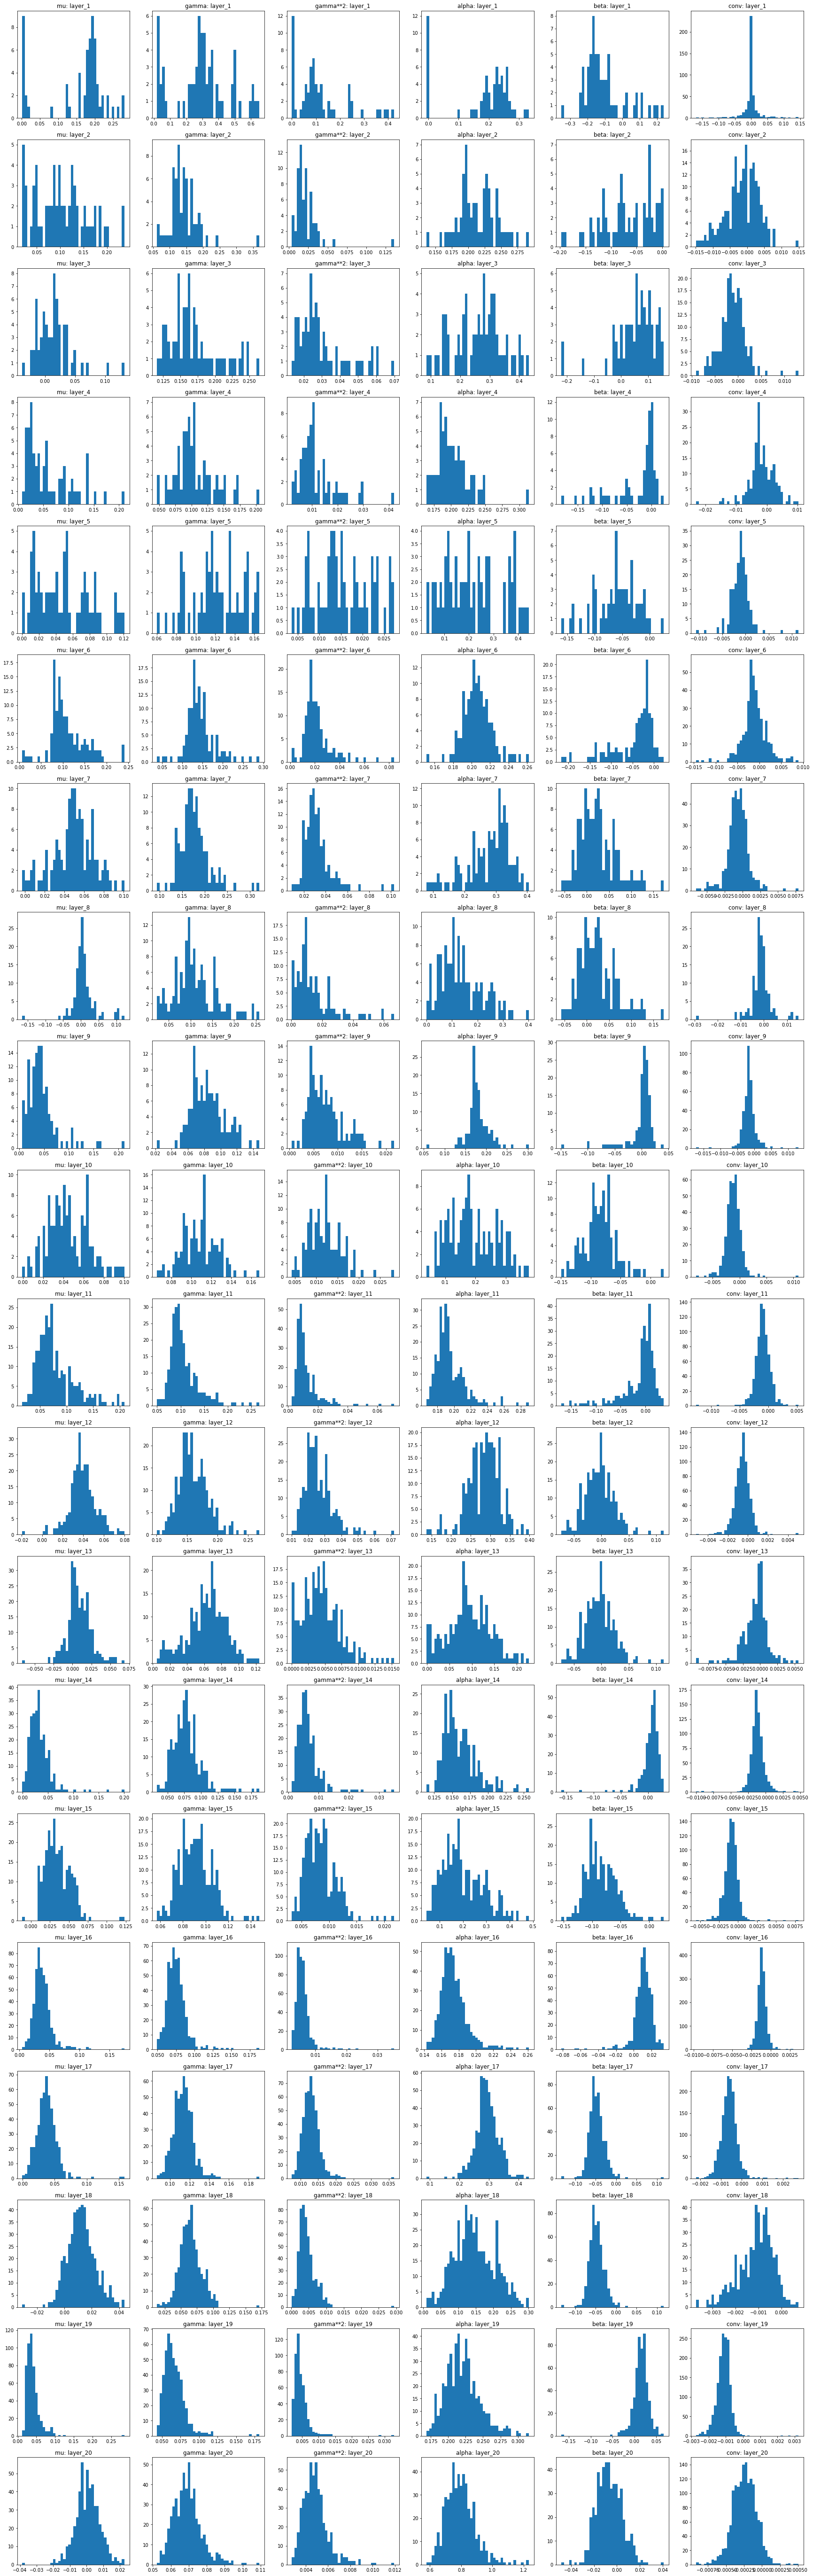

20 20 20 20 20


In [20]:
#constrained
model = torch.load("./results/imagenet/done_norm_layer_+cbn+cweight+10+cdecay+1_average/59_checkpoint.pth.tar", map_location="cpu")

mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")

gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")

small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    print(b.min())
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    print("layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))
    plt.title("gamma**2: layer_{}".format(i+1))
# print("============alpha ==========" + "min gamma**2 {} ".format(b_min +  "layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

In [18]:
#bn
model = torch.load("results/resnet18_bn_bsz512+norm+mybn_Sat-Aug--8-10:11:44-2020/101_checkpoint.pth.tar", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]
f = open("bn_bsz_1024.txt", 'w')
mean = ''
var = ''
for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(mu[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(mu[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============gamma =========== ")
f.write("")
    
mean = ''
var = ''
gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(gamma[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(gamma[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============alpha =========== ")

mean = ''
var = ''
alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(alpha[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(alpha[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============betta =========== ")

mean = ''
var = ''
beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(beta[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(beta[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============conv =========== ")

mean = ''
var = ''
for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(conv[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(conv[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
plt.savefig("bn(bn-relu).pdf")
plt.show()




============mu =========== 
mean: 
var: 
============gamma =========== 
mean: 
var: 
============alpha =========== 
mean: 
var: 
============betta =========== 
mean: 
var: 
============conv =========== 


ValueError: num must be 1 <= num <= 0, not 5

<Figure size 1800x7200 with 0 Axes>

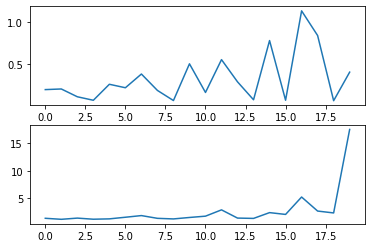

In [22]:
model = torch.load("./results/imagenet/constraint_20+norm_layer_+cbn+noise_0.0001+warmup_+41,61,81_Mon-Aug-10-07:16:21-2020/119_checkpoint.pth.tar",map_location="cpu")
track_times = model['state_dict']['module.bn1.tracking_times']
mean = [j/track_times  for (i,j) in model['state_dict'].items() if 'mean' in i]
mean = [i.abs().mean() for i in mean]
plt.subplot(211)
plt.plot(mean)
var = [j/track_times  for (i,j) in model['state_dict'].items() if 'var' in i]
var = [i.abs().mean() for i in var]
plt.subplot(212)
plt.plot(var)

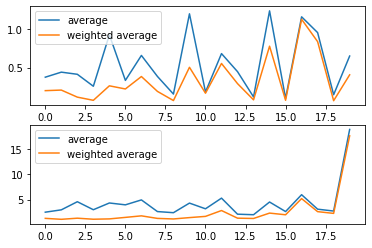

In [12]:
# plot training and variance
model_old = torch.load("./results/imagenet/constraint_20+norm_layer_+cbn+noise_0.0001+warmup_+41,61,81_Mon-Aug-10-07:16:21-2020/119_checkpoint.pth.tar",map_location="cpu")
track_times = model_old['state_dict']['module.bn1.tracking_times']
mean_old = [j/track_times  for (i,j) in model_old['state_dict'].items() if 'mean' in i]
mean_old = [i.abs().mean().numpy() for i in mean_old]
# plt.subplot(211)
# plt.plot(mean)
var_old = [j/track_times  for (i,j) in model_old['state_dict'].items() if 'var' in i]
var_old = [i.abs().mean().numpy() for i in var_old]
# plt.subplot(212)
# plt.plot(var)
model = torch.load("./results/imagenet/done_norm_layer_+cbn+cweight+10+cdecay+1_average/59_checkpoint.pth.tar", map_location="cpu")
track_times = model['state_dict']['module.bn1.tracking_times']
mean = [j/track_times  for (i,j) in model['state_dict'].items() if 'mean' in i and 'weight' not in i]
mean = [i.abs().mean().numpy() for i in mean]
plt.subplot(211)
plt.plot(mean, label="average")
plt.plot(mean_old, label="weighted average")
plt.legend()
var = [j/track_times  for (i,j) in model['state_dict'].items() if 'var' in i and 'weight' not in i]
var = [i.abs().mean().numpy() for i in var]
plt.subplot(212)
plt.plot(var, label="average")
plt.plot(var_old, label="weighted average")
plt.legend()

In [27]:
var = [j/track_times  for (i,j) in model['state_dict'].items() if 'var' in i and 'weight' not in i]
# var = [i.abs().mean().numpy() for i in var]


In [29]:
len(var)

20